<a href="https://colab.research.google.com/github/sidhunt/ML-implementations/blob/main/Perceptron_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Assignment Submission by Siddhant Badola (ID-1154586)
---



# **Problem Statement:**To implement Rosebblatt's Perceptron in python




---
# **Methodology**: This is a 2 part assignment that first implements the RB Perceptron using *Half-moon* dataset as dummy data to train the model and test it and then use the UCI data set for second part to implement real world datasets.[Link to UCI dataset I used in second part](https://archive.ics.uci.edu/ml/datasets/Skin+Segmentation)


---
# Result/Implementation




We will import the libraries *numpy* and *matplotlib* to create and compute N-D arrays and plot them on a graph

In [ ]:
import numpy as np
from matplotlib import pyplot as plot


# Part 1
Our model is created in the form **Perceptron** class which contains 2 primary functions.

```
trainModel()
testModel()
```

While the train model is used to train the Perceptron, it will also output the *learning curve* which shows how did the model performed on trainin set. The test model will show the classification and the testing accuracy of the model. 

In [ ]:

def addBias(self,bias):                        #adding bias to the weight vector
  return np.insert(self.weights,0,bias)

def epochIterations(self,ee,mse,num_tr):         #epoch iteration
  for epoch in range(1,self.epochs + 1):
    # if(epoch%10==0):
    #   print("epoch - %d"% epoch)
    shuffle_seq=np.random.choice(self.data.shape[0],num_tr,replace=True)
    data_shuffled_tr=self.data[shuffle_seq]
    mse[epoch-1]=(np.square(ee)).mean(axis=0)
    for i in range(1,num_tr+1):
      x=data_shuffled_tr[i-1][0:2]
      x=np.insert(x,0,1)
      d=data_shuffled_tr[i-1][2]
      y=np.sign(np.transpose(self.weights).dot(x))
      ee[i-1]=d-y
      w_new=self.weights+(x.dot(self.eta*ee[i-1]))
      self.weights=w_new

def plotLCurve(t,x,y,plotData):                  # Plotting the Learning Curve
  plot.title(t)
  plot.xlabel(x)
  plot.ylabel(y)
  plot.plot(plotData)
  plot.show()

def plotClass(self,num_te,data_shuffled_te):     #Plotting the classification points
  for i in range(1,num_te+1):
    x=data_shuffled_te[i-1][0:2]
    x=np.insert(x,0,1)
    d=data_shuffled_te[i-1][2]
    y=np.sign(np.transpose(self.weights).dot(x))
    if y==1:
      plot.plot(x[1],x[2],'rx')
    if y==-1:
      plot.plot(x[1],x[2],'b+')
    if not d-y==0:
      self.error= self.error+1
  print("---------------\nPoints Tested : {0}\nError Points : {1} ({2}%)\nTesting accuracy: ({3}%)\n".format(num_te,self.error,((self.error/num_te)*100),(100-(self.error/num_te)*100)))
  plot.title("Classification using Perceptron")
  plot.xlabel("X")
  plot.ylabel("Y")
  plot.show()

class Perceptron:                                               #Perceptron Class
  def __init__(self,input_data,neurons,bias,epochs,eta):
    self.data=input_data.T
    self.neurons=neurons
    self.bias=bias
    self.epochs=epochs
    self.eta=eta
    self.error=0
    self.weights=np.zeros(neurons)
    self.weigths= addBias(self,bias)

  def trainModel(self,num_tr):                                  #Training Model
    ee=np.zeros(num_tr)
    mse=np.zeros(self.epochs)
    epochIterations(self,ee,mse,num_tr)
    plotLCurve("Learning Curve","Epochs","MSE",mse)

  def testModel(self,num_te,num_tr):                            #Testing Model
    data_transpose=self.data.T
    x_min = np.amin(data_transpose[0])
    x_max = np.amax(data_transpose[0])
    y_min = np.amin(data_transpose[1])
    y_max = np.amax(data_transpose[1])
    x_b,y_b= np.meshgrid(np.arange(x_min,x_max,(x_max - x_min)/100),np.arange(y_min,y_max,(y_max - y_min)/100))
    z_b= np.zeros(x_b.shape)
    for x1 in range(0,len(x_b)):
      for y1 in range(0,len(y_b)):
        input = np.array([1,x_b[x1,y1],y_b[x1,y1]])
        z_b[x1,y1]= np.transpose(self.weights).dot(input)

    shuffle_seq=np.random.choice(self.data.shape[0],num_te,replace=True)
    data_shuffled_te=self.data[shuffle_seq]
    plotClass(self,num_te,data_shuffled_te)
     

We have generated the halfmoon dataset using the halfmoon() function and have provided the following parameters:-


*   radius=10
*   width=6
*   dist=0 (edge of seperability)
*   sample= number of training + number of testing= 1000+2000=3000

We have provided the following parameters to the Perceptron class:-

* data=halfmoon dataset
* neurons=3
* epochs=200
* bias=dist/2=0/2=0
* eta=0.1

After the code is executed we get the output after the provided code.



-----------------
Total Sample Generated : 3000

Halfmoon Radius        : 10.0

Halfmoon Width         : 6.0

Distance Between       : 0.0
------------------


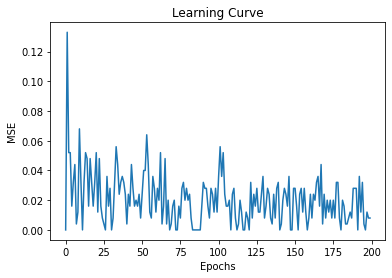

---------------
Points Tested : 2000
Error Points : 12 (0.6%)
Testing accuracy: (99.4%)



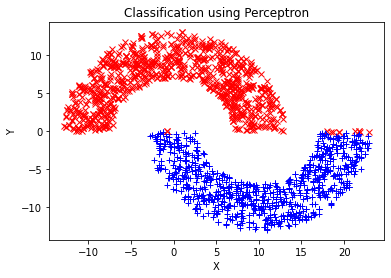

In [ ]:
def main():
  rad = 10
  width = 6
  dist = 0
  num_tr = 1000
  num_te = 2000
  sample = num_tr + num_te

  [data,shuffled_data] = halfmoon(rad, width, dist, sample)
  print("-----------------\nTotal Sample Generated : %d\n" % sample)
  print("Halfmoon Radius        : %2.1f\n" % rad)
  print("Halfmoon Width         : %2.1f\n" % width)
  print("Distance Between       : %2.1f\n------------------" % dist)
  neurons = 3
  bias = dist / 2
  epochs = 200
  eta = 0.1

  pr = Perceptron(data, neurons, bias, epochs, eta)                  #Providing inputs to the Perceptron
  pr.trainModel(num_tr)                                              #Training
  pr.testModel(num_te, num_tr)                                       #Testing

def halfmoon(rad, width, d, n_samp):
  
  if n_samp%2 != 0:
    n_samp += 1  
    
  data = np.zeros((3,n_samp))
      
  aa = np.random.random_sample((2,n_samp//2))  
  radius = (rad-width//2) + width*aa[0,:] 
  theta = np.pi*aa[1,:]        
      
  x     = radius*np.cos(theta)  
  y     = radius*np.sin(theta)  
  label = np.ones((1,len(x)))         #  Class 1 label  
      
  x1    = radius*np.cos(-theta) + rad  
  y1    = radius*np.sin(-theta) - d  
  label1= -1*np.ones((1,len(x1)))     #  Class 2 label 
     
  data[0,:]=np.concatenate([x,x1])
  data[1,:]=np.concatenate([y,y1])
  data[2,:]=np.concatenate([label,label1],axis=1)
  data_shuffled = shuffle_data(data)
    
  return [data, data_shuffled]

def shuffle_data(data):
  data_shuffled = data[:]
  data_shuffled = data_shuffled.T
  data_shuffled = np.random.permutation(data_shuffled)
  data_shuffled = data_shuffled.T
  return data_shuffled
if __name__ == "__main__":
  main()





As you can see the learning curve converges to optimal accuracy.
Also 2000 data points are tested which gives us testing accuracy of **99.4%**.


---

# Part 2
We now upload a dataset from UCI website.I have chosen **Skin Segmentation Data Set**.[Link to UCI dataset I used in second part](https://archive.ics.uci.edu/ml/datasets/Skin+Segmentation).
As described in the website:-


> The skin dataset is collected by randomly sampling B,G,R values from face images of various age groups (young, middle, and old), race groups (white, black, and asian), and genders obtained from FERET database and PAL database. Total learning sample size is 245057; out of which 50859 is the skin samples and 194198 is non-skin samples.


We will first upload the dataset to colab.


In [ ]:
from google.colab import files
files.upload()

Saving Skin_NonSkin.txt to Skin_NonSkin.txt


{'Skin_NonSkin.txt': b'74\t85\t123\t1\r\n73\t84\t122\t1\r\n72\t83\t121\t1\r\n70\t81\t119\t1\r\n70\t81\t119\t1\r\n69\t80\t118\t1\r\n70\t81\t119\t1\r\n70\t81\t119\t1\r\n76\t87\t125\t1\r\n76\t87\t125\t1\r\n77\t88\t126\t1\r\n77\t88\t126\t1\r\n77\t88\t126\t1\r\n78\t89\t127\t1\r\n77\t85\t125\t1\r\n78\t86\t126\t1\r\n78\t86\t126\t1\r\n77\t85\t125\t1\r\n76\t84\t124\t1\r\n77\t85\t125\t1\r\n80\t88\t128\t1\r\n83\t91\t131\t1\r\n83\t91\t131\t1\r\n84\t92\t132\t1\r\n84\t92\t132\t1\r\n83\t91\t131\t1\r\n80\t88\t128\t1\r\n78\t86\t126\t1\r\n78\t86\t126\t1\r\n79\t87\t127\t1\r\n78\t86\t126\t1\r\n79\t87\t127\t1\r\n81\t89\t129\t1\r\n82\t90\t130\t1\r\n83\t91\t131\t1\r\n82\t90\t130\t1\r\n81\t89\t129\t1\r\n81\t89\t129\t1\r\n84\t92\t132\t1\r\n81\t89\t129\t1\r\n79\t87\t127\t1\r\n79\t87\t127\t1\r\n82\t90\t130\t1\r\n83\t91\t131\t1\r\n82\t90\t130\t1\r\n78\t88\t128\t1\r\n79\t89\t129\t1\r\n78\t90\t130\t1\r\n79\t91\t131\t1\r\n80\t92\t132\t1\r\n80\t92\t132\t1\r\n80\t92\t132\t1\r\n80\t92\t132\t1\r\n79\t91\t131\t1\r\n83\t9

Since the data is of .txt type, we will import *pandas* library to manipulate the data.

In [ ]:
import pandas as pd

We will take a quick look to see structure of dataset.

In [ ]:
df=pd.read_csv('./Skin_NonSkin.txt')
df.head()

74\t85\t123\t1
0  73\t84\t122\t1
1  72\t83\t121\t1
2  70\t81\t119\t1
3  70\t81\t119\t1
4  69\t80\t118\t1

We will now convert the data to .csv and remove the tab space which is used as delimiter.

In [ ]:
df.to_csv('./data.csv')
df1=pd.read_csv('./Skin_NonSkin.txt',sep="\t")
df1.head()

74  85  123  1
0  73  84  122  1
1  72  83  121  1
2  70  81  119  1
3  70  81  119  1
4  69  80  118  1

We will then convert csv data to numpy array. 

In [ ]:

dataSkin=df1.to_numpy()


Let's take a look at structure of the numpy array created.We will also shuffle the data randomly to get mixed labels.

In [ ]:
print(dataSkin.shape)
print(dataSkin)
np.random.shuffle(dataSkin)           #shuffle the dataset


(245056, 4)
[[178 176 128   2]
 [161 165 130   2]
 [144 145 106   2]
 ...
 [171 168 123   2]
 [ 85 131 215   1]
 [118 156 210   1]]


We will now normalize the data to range of 0 to 1.Present data ranges from 0 to 255.We will do so by dividing each RGB element by 255.

In [ ]:
dataNorm=np.empty((0,4),dtype=np.int)                          #empty numpy array
print(dataNorm.shape)
c=0
xCount=0
yCount=0
for R,G,B,y in dataSkin:                                        #loop to normalize dataset
  c=c+1
  S=255
  Rn=R/S
  Gn=G/S
  Bn=B/S
  if(y==1):
    xCount=xCount+1
  elif(y==2):
    yCount=yCount+1
  dataNorm=np.append(dataNorm,np.array([[Rn,Gn,Bn,y-1]]),axis=0)
  if(xCount>10000 and yCount>10000):                             #condition to limit dataset
    break
print(dataNorm.shape)                                          #dimensions of the normalized dataset


(0, 4)
(48082, 4)


The Skin Segmentation dataset has been normalized and ready to be used by the Perceptron.The Perceptron will simply classify if the RGB value is skin value or non-skin value.

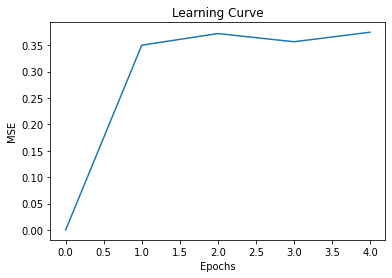

---------------
Points Tested : 3000
Error Points : 774 (25.8%)
Testing accuracy: (74.2%)



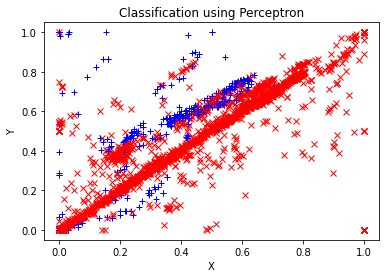

In [ ]:

def addBias(self,bias):
  return np.insert(self.weights,0,bias)    #adding bias to the weight vector

def epochIterations(self,ee,mse,num_tr):   #epoch iteration
  for epoch in range(1,self.epochs + 1):
    if(epoch%10==0):
      print("epoch - %d"% epoch)
    shuffle_seq=np.random.choice(self.data.shape[0],num_tr,replace=True)
    data_shuffled_tr=self.data[shuffle_seq]
    mse[epoch-1]=(np.square(ee)).mean(axis=0)
    for i in range(1,num_tr+1):
      x=data_shuffled_tr[i-1][0:3]
      x=np.insert(x,0,1)
      d=data_shuffled_tr[i-1][3]
      y2=np.sign(np.transpose(self.weights).dot(x))
      ee[i-1]=d-y2
      w_new=self.weights+(x.dot(self.eta*ee[i-1]))
      self.weights=w_new
  return mse

def plotLCurve(t,x,y,plotData):            # Plotting the Learning Curve
  plot.title(t)
  plot.xlabel(x)
  plot.ylabel(y)
  plot.plot(plotData)
  plot.show()

def plotClass(self,num_te,data_shuffled_te):    #Plotting the classification points
  for i in range(1,num_te+1):
    x=data_shuffled_te[i-1][0:3]
    x=np.insert(x,0,1)
    d=data_shuffled_te[i-1][3]  
    y1=np.sign(np.transpose(self.weights).dot(x))
    if y1>0:
      plot.plot(x[1],x[2],'rx')
    if y1<=0:
      plot.plot(x[1],x[2],'b+')
    if not d==y1:
      self.error= self.error+1
  print("---------------\nPoints Tested : {0}\nError Points : {1} ({2}%)\nTesting accuracy: ({3}%)\n".format(num_te,self.error,((self.error/num_te)*100),(100-(self.error/num_te)*100)))
  plot.title("Classification using Perceptron")
  plot.xlabel("X")
  plot.ylabel("Y")
  plot.show()
 
class Perceptron1:                                  #Perceptron Class
  def __init__(self,input_data,neurons,bias,epochs,eta):
    self.data=input_data
    self.neurons=neurons
    self.bias=bias
    self.epochs=epochs
    self.eta=eta
    self.error=0
    self.weights=np.zeros(neurons)
    self.weigths= addBias(self,bias)
 
  def trainModel(self,num_tr):                       #Training Model
    ee=np.zeros(num_tr)
    mse=np.zeros(self.epochs)
    mse1=epochIterations(self,ee,mse,num_tr)
    plotLCurve("Learning Curve","Epochs","MSE",mse1)

  def testModel(self,num_te):                        #Testing Model
    data_transpose=self.data.T
    x_min = np.amin(data_transpose[0])
    x_max = np.amax(data_transpose[0])
    y_min = np.amin(data_transpose[1])
    y_max = np.amax(data_transpose[1])
    z_min = np.amin(data_transpose[2])
    z_max = np.amax(data_transpose[2])
    x_b,y_b,z_b= np.meshgrid(np.arange(x_min,x_max,(x_max - x_min)/100),np.arange(y_min,y_max,(y_max - y_min)/100),np.arange(z_min,z_max,(z_max - z_min)/100))
    z1_b= np.zeros(x_b.shape)
    for x1 in range(0,len(x_b)):
      for y1 in range(0,len(y_b)):
        for z1 in range(0,len(z_b)):
          input = np.array([1,x_b[x1,y1,z1],y_b[x1,y1,z1],z_b[x1,y1,z1]])
          z1_b[x1,y1,z1]= np.transpose(self.weights).dot(input)

    shuffle_seq=np.random.choice(self.data.shape[0],num_te,replace=True)
    data_shuffled_te=self.data[shuffle_seq]
    plotClass(self,num_te,data_shuffled_te)

def main2():
  num_tr=2000
  num_te=3000
  neurons = 4
  bias = 0.5
  epochs = 5
  eta = 0.1

  percept = Perceptron1(dataNorm, neurons, bias, epochs, eta)          #Providing inputs to the Perceptron
  percept.trainModel(num_tr)                                           #Training
  percept.testModel(num_te)                                            #Testing

if __name__ == "__main__":
  main2()

We can see the learning curve as well as the classification graph.Also we trained 2000 points and tested 3000 points to get testing accuracy of **74.2%**.

Also as personal obeservation, running the model for more than 5 epochs was causing "overfitting" and data was not being classified properly. 


---

